# Getting Started

In this example, we will generate labels on a mock dataset of transactions. For each customer, we want to label whether the total purchase amount over the next hour of transactions will exceed 100. Additionally, we want to predict one hour in advance.


## Install

For installation, we run the following command.

```
pip install composeml
```

## Load Data
With the package installed, we load in the data. To get an idea on how the transactions looks, we preview the data frame.

In [1]:
from composeml.datasets import transactions

df = transactions()

df[df.columns[:5]].head()

,transaction_id,session_id,product_id,amount,customer_id
transaction_time,,,,,
2014-01-01 03:13:51,190,14,5,120.52,1
2014-01-01 11:04:42,350,19,3,65.43,3
2014-01-02 11:44:35,254,11,5,128.51,4
2014-01-02 17:12:39,337,16,2,105.15,2
2014-01-02 17:46:20,177,29,5,65.11,1


## Create Labeling Function

First, we define the function that will return the total purchase amount given a hour of transactions.

In [2]:
def my_labeling_function(df_slice):
    label = df_slice["amount"].sum()
    return label

In [3]:
from composeml import LabelMaker

label_maker = LabelMaker(
    target_entity="customer_id",
    time_index="transaction_time",
    labeling_function=my_labeling_function,
    window_size="1h",
)

In [4]:
labels = label_maker.search(
    df,
    minimum_data="1h",
    num_examples_per_instance=25,
    gap=1,
    verbose=True,
)

labels.head()

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|████████████████████| customer_id: 5/5 


,customer_id,time,my_labeling_function
label_id,,,
0,1,2014-01-01 04:13:51,65.11
1,1,2014-01-03 15:41:34,101.08
2,1,2014-01-05 11:46:10,16.78
3,1,2014-01-06 09:54:58,108.16
4,1,2014-01-08 08:54:02,48.33


In [5]:
labels = labels.threshold(100)

labels.head()

,customer_id,time,my_labeling_function
label_id,,,
0,1,2014-01-01 04:13:51,False
1,1,2014-01-03 15:41:34,True
2,1,2014-01-05 11:46:10,False
3,1,2014-01-06 09:54:58,True
4,1,2014-01-08 08:54:02,False


In [6]:
labels = labels.apply_lead('1h')

labels.head()

,customer_id,time,my_labeling_function
label_id,,,
0,1,2014-01-01 03:13:51,False
1,1,2014-01-03 14:41:34,True
2,1,2014-01-05 10:46:10,False
3,1,2014-01-06 08:54:58,True
4,1,2014-01-08 07:54:02,False


In [7]:
labels.describe()

Total number of labels:  125

False    75
True     50
Name: my_labeling_function, dtype: int64

my_labeling_function
False    75
True     50
Name: count, dtype: int64

name                         my_labeling_function
target_entity                         customer_id
num_examples_per_instance                      25
minimum_data                                   1h
window_size                                    1h
gap                                             1
threshold                                     100
lead                                           1h
dtype: object



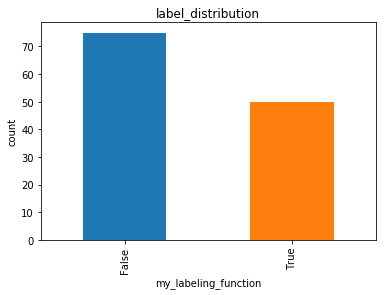

In [8]:
%matplotlib inline

labels.plot.distribution()

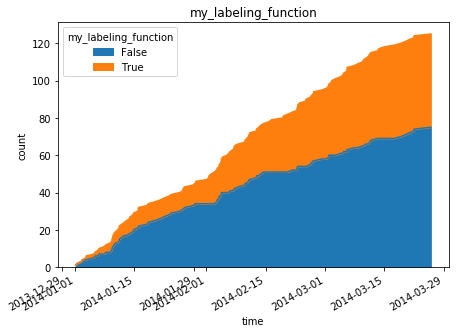

In [9]:
labels.plot.count_by_time(figsize=(7, 5))